# Ford GoBike System Dateset
## by Ahmad ALMosallam


Ford GoBike System Dateset is a dateset that contains trip data from lyft's bike service for public use. Variables including, trip duration, start time and end time with date, start station and end station names, start and end coordinates, customer type, year of birth and gender.

In [425]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from requests import get
from zipfile import ZipFile
from io import StringIO, BytesIO
from timeit import default_timer as timer
import os
%matplotlib inline

Loading the dataset

In [426]:
link = "https://s3.amazonaws.com/baywheels-data/202001-baywheels-tripdata.csv.zip"
filename = link[40:-4]

In [427]:
# get the data from the site
zipfile = get(link)
with ZipFile(BytesIO(zipfile.content)) as file:
    file.extract(member = filename, path = './Data')

In [428]:
df = pd.read_csv('./Data/' + filename)

C:\Users\ahmad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [429]:
# Here are all rest data from the wesite https://s3.amazonaws.com/baywheels-data/index.html For 2020 year
links = ["https://s3.amazonaws.com/baywheels-data/202002-baywheels-tripdata.csv.zip",
        "https://s3.amazonaws.com/baywheels-data/202003-baywheels-tripdata.csv.zip"]
start = timer()
for link in links:
    zipfile = get(link)
    filename = link[40:-4]
    with ZipFile(BytesIO(zipfile.content)) as file:
        file.extract(member = filename, path = './Data')
        
end = timer()
print(end - start)

23.839469499995175


In [430]:
# Put all the data in one Dataframe
list_of_filenames = os.listdir('./Data')
for filename in list_of_filenames:
    d = pd.read_csv('./Data/' + filename)
    df = df.append(d)

In [431]:
print(df.shape)
df.head()

(1200861, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200861 entries, 0 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1200861 non-null  int64  
 1   start_time               1200861 non-null  object 
 2   end_time                 1200861 non-null  object 
 3   start_station_id         564991 non-null   float64
 4   start_station_name       566804 non-null   object 
 5   start_station_latitude   1200861 non-null  float64
 6   start_station_longitude  1200861 non-null  float64
 7   end_station_id           565159 non-null   float64
 8   end_station_name         567010 non-null   object 
 9   end_station_latitude     1200861 non-null  float64
 10  end_station_longitude    1200861 non-null  float64
 11  bike_id                  1200861 non-null  int64  
 12  user_type                1200861 non-null  object 
 13  rental_access_method     803604 non-null   

In [433]:
# rental_access_method have missing values so I dropped them
df = df.query("rental_access_method == 'app' or rental_access_method == 'clipper'")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803604 entries, 110108 to 176798
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             803604 non-null  int64  
 1   start_time               803604 non-null  object 
 2   end_time                 803604 non-null  object 
 3   start_station_id         167734 non-null  float64
 4   start_station_name       169547 non-null  object 
 5   start_station_latitude   803604 non-null  float64
 6   start_station_longitude  803604 non-null  float64
 7   end_station_id           167902 non-null  float64
 8   end_station_name         169753 non-null  object 
 9   end_station_latitude     803604 non-null  float64
 10  end_station_longitude    803604 non-null  float64
 11  bike_id                  803604 non-null  int64  
 12  user_type                803604 non-null  object 
 13  rental_access_method     803604 non-null  object 
dtyp

In [434]:
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
264170,2558,2020-01-31 16:11:02,2020-01-31 16:53:41,NaN,NaN,37.790826,-122.400167,NaN,NaN,37.806685,-122.405294,651432,Subscriber,app


In [435]:
# check for duplicate rows
df.duplicated().sum()

193258

In [436]:
# Drop duplicated rows
df = df.drop_duplicates()
print(df.shape)
print(df.duplicated().sum())

(610346, 14)
0


In [437]:
# Drop when the start latitude or the longitude are 0
df = df[df.start_station_longitude != 0]

In [438]:
# Drop when the end latitude or the longitude are 0
df = df[df.end_station_latitude != 0]

<a id='distance'></a>

In [439]:
# This funtion gets the distance between the the start station and the end station
from math import sin, cos, sqrt, atan2, radians

def distance_between_startStation_endStation (df ,lat1,lon1,lat2,lon2):
    #  approximate radius of earth in km
    R = 6373.0
    lat1 = df[lat1]
    lat2 = df[lat2]
    lon1 = df[lon1]
    lon2 = df[lon2]
    lon1 , lat1 , lon2,lat2 = map(np.radians , [lon1 , lat1 , lon2,lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    return np.float64(round(1000*distance))

In [440]:
# calculating the distance in each trip
df['distance'] = distance_between_startStation_endStation(df , 'start_station_longitude',
                                                               'start_station_latitude'
                                                               ,'end_station_longitude',
                                                               'end_station_latitude')
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,distance
135581,729,2020-03-20 18:22:09,2020-03-20 18:34:18,NaN,NaN,37.78048,-122.394669,NaN,NaN,37.777568,-122.394151,941795,Customer,app,183.0


<a id='drop'><a/>

In [441]:
# Drop some useless columns
df.drop(axis=1 , columns=['end_station_id' , 'end_station_name' , 'start_station_id' , 'start_station_name' , 'bike_id']
        , inplace=True)

In [442]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'user_type', 'rental_access_method',
       'distance'],
      dtype='object')

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610311 entries, 110116 to 176798
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             610311 non-null  int64  
 1   start_time               610311 non-null  object 
 2   end_time                 610311 non-null  object 
 3   start_station_latitude   610311 non-null  float64
 4   start_station_longitude  610311 non-null  float64
 5   end_station_latitude     610311 non-null  float64
 6   end_station_longitude    610311 non-null  float64
 7   user_type                610311 non-null  object 
 8   rental_access_method     610311 non-null  object 
 9   distance                 610311 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 51.2+ MB


In [444]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')
df['user_type'] = df['user_type'].astype('category')
df['rental_access_method'] = df['rental_access_method'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610311 entries, 110116 to 176798
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             610311 non-null  int64         
 1   start_time               610311 non-null  datetime64[ns]
 2   end_time                 610311 non-null  datetime64[ns]
 3   start_station_latitude   610311 non-null  float64       
 4   start_station_longitude  610311 non-null  float64       
 5   end_station_latitude     610311 non-null  float64       
 6   end_station_longitude    610311 non-null  float64       
 7   user_type                610311 non-null  category      
 8   rental_access_method     610311 non-null  category      
 9   distance                 610311 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(5), int64(1)
memory usage: 43.1 MB


In [445]:
# Get the day of each ride and store it on column day

# Get the data if the start time day is diffrent than the end time
d = df[pd.DatetimeIndex(df.start_time).date != pd.DatetimeIndex(df.end_time).date]
d

df['day'] = df.start_time.dt.day_name()
df.loc[pd.DatetimeIndex(df.start_time).date != pd.DatetimeIndex(df.end_time).date , 'day'] = d.end_time.dt.day_name()

In [446]:
# List of days in order
day_order = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
# create ordered categorical variable
df['day'] = pd.Categorical(df['day'],
                           categories= day_order,
                           ordered = True)

### What is the structure of your dataset?

Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Rental Access Method (App or Clipper)

### What is/are the main feature(s) of interest in your dataset?

- User Type
- Rental Access Method
- Trip Duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Start Station Latitude
- Start Station Longitude
- End Station Latitude
- End Station Longitude

## Univariate Exploration

In [447]:
df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,rental_access_method,distance,day
110116,1600,2020-01-18 19:03:45,2020-01-18 19:30:25,37.275291,-121.891856,37.280270,-121.908048,Customer,app,1825.0,Saturday
110117,1938,2020-01-25 17:32:53,2020-01-25 18:05:12,37.279192,-121.835867,37.259106,-121.831157,Customer,app,1290.0,Saturday
110118,2007,2020-01-25 17:33:13,2020-01-25 18:06:40,37.279202,-121.835868,37.258978,-121.831147,Customer,app,1298.0,Saturday
110119,567,2020-01-29 15:32:04,2020-01-29 15:41:32,37.282298,-121.838755,37.292066,-121.832024,Customer,app,943.0,Wednesday
110120,1107,2020-01-30 17:41:38,2020-01-30 18:00:05,37.283072,-121.832709,37.304321,-121.860995,Customer,app,3384.0,Thursday


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610311 entries, 110116 to 176798
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             610311 non-null  int64         
 1   start_time               610311 non-null  datetime64[ns]
 2   end_time                 610311 non-null  datetime64[ns]
 3   start_station_latitude   610311 non-null  float64       
 4   start_station_longitude  610311 non-null  float64       
 5   end_station_latitude     610311 non-null  float64       
 6   end_station_longitude    610311 non-null  float64       
 7   user_type                610311 non-null  category      
 8   rental_access_method     610311 non-null  category      
 9   distance                 610311 non-null  float64       
 10  day                      610311 non-null  category      
dtypes: category(3), datetime64[ns](2), float64(5), int64(1)
memory usage: 43.

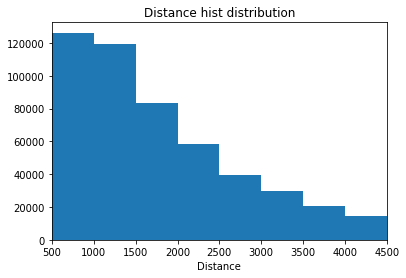

In [449]:
# Distance hist distribution
bin_edges = np.arange(0, (2133 + 1.5* 1247) +500, 500)
plt.hist(data = df, x ='distance', bins = bin_edges);
plt.title('Distance hist distribution')
plt.xlim((500,4500))
plt.xlabel('Distance');

**Observation:** As showen above the distribution is roughly right skewed, and most the trip distance between 500 to 1500 meters

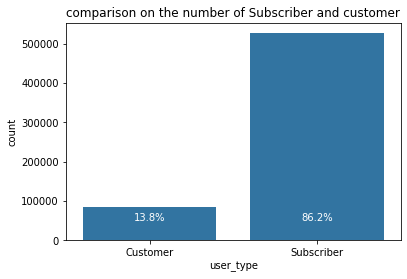

In [450]:
# Plot of the type of users
type_user = df.user_type.value_counts()
sb.countplot(data = df , x = 'user_type' , color = sb.color_palette()[0]);
plt.title('comparison on the number of Subscriber and customer');

locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_user[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, 50000, pct_string, ha = 'center', color = 'w');

**Observation:** From the plot above it`s clear that most of the clients are subscribers with 86.2% and for the customer 13.8.

<a id='rental'></a>

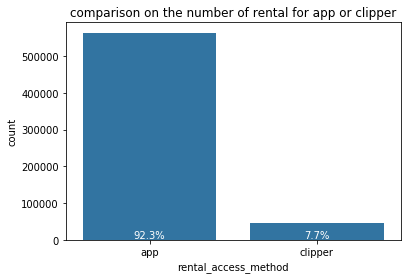

In [451]:
# Plot of the type of users
type_rental = df.rental_access_method.value_counts()
sb.countplot(data = df , x = 'rental_access_method' , color = sb.color_palette()[0]);
plt.title('comparison on the number of rental for app or clipper');

locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_rental[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])

    # print the annotation just below the top of the bar
    plt.text(loc, 5000, pct_string, ha = 'center', color = 'w');

**Observation:** From the plot above 92.3% of the clients uses the app to get a bike and 7.7% uses clipper.

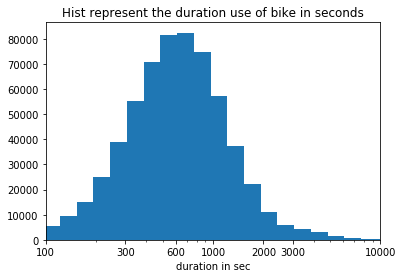

In [452]:
bin_edges = 10 ** np.arange(1.785330, 4.936358 + 0.1, 0.1)
ticks = [100,300, 600 ,1000 ,2000,3000,10000]
labls = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x ='duration_sec', bins = bin_edges);
plt.xscale("log");
plt.xticks(ticks,labls);
plt.title('Hist represent the duration use of bike in seconds')
plt.xlim((100,10000))
plt.xlabel('duration in sec');

**Observation:** From the plot above clearly most of the riders spend around 300 to 1000 sec in minute 5 to 17 minute.and there is small number of the riders spend 10,000 sec almost 3 hours. The average is around 600 to 1000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

in the duration_sec I used log scale to get an uniform distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No, none of the features were there any unusual.

I calculated the distance for each trip using the function [here](#distance). Also, dropped some useless columns [here](#drop)

## Bivariate Exploration



In [453]:
df.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,rental_access_method,distance,day
110116,1600,2020-01-18 19:03:45,2020-01-18 19:30:25,37.275291,-121.891856,37.280270,-121.908048,Customer,app,1825.0,Saturday
110117,1938,2020-01-25 17:32:53,2020-01-25 18:05:12,37.279192,-121.835867,37.259106,-121.831157,Customer,app,1290.0,Saturday
110118,2007,2020-01-25 17:33:13,2020-01-25 18:06:40,37.279202,-121.835868,37.258978,-121.831147,Customer,app,1298.0,Saturday
110119,567,2020-01-29 15:32:04,2020-01-29 15:41:32,37.282298,-121.838755,37.292066,-121.832024,Customer,app,943.0,Wednesday
110120,1107,2020-01-30 17:41:38,2020-01-30 18:00:05,37.283072,-121.832709,37.304321,-121.860995,Customer,app,3384.0,Thursday


In [454]:
numeric_vars = ['duration_sec', 'start_station_latitude', 'start_station_longitude' ,'end_station_latitude' ,
                'end_station_longitude' , 'distance']

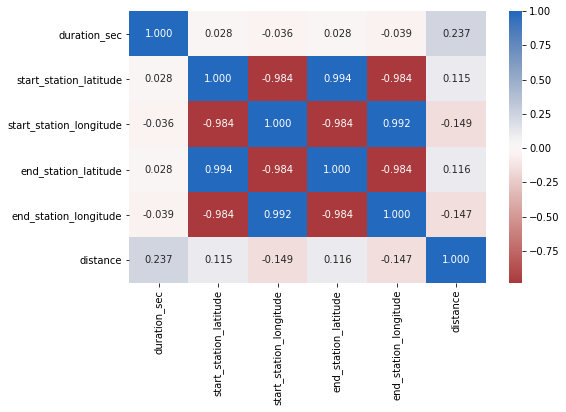

In [455]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Observation:** As expected, the start_station_latitude and end_station_latitude have a strong correlation with 0,994 also the start_station_longitude and end_station_longitude have a strong correlation with 0,992.
But the start_station_latitude and start_station_longitude have a negitive correlation with -0.984 as expected.
The distance and the duration_sec have a low positive correlation with 0.249. 

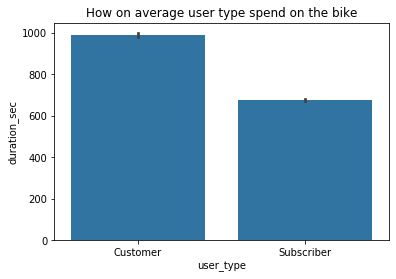

In [456]:
sb.barplot(data = df.query("distance <= 2133+ 1.5*1247"),x = 'user_type',y='duration_sec',
               color = sb.color_palette()[0]);
plt.title('How on average user type spend on the bike');

**Observation:** Customer spend more on riding than subscriber. 

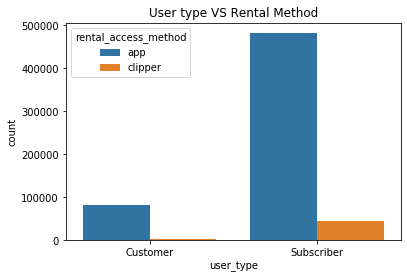

In [457]:
# Plot to show the number of user_type using the app or the clipper
sb.countplot(data = df , x = 'user_type' , hue='rental_access_method');
plt.title('User type VS Rental Method');

**Observation:** As ecpected, due to this [plot](#rental), the use of app is more for both the user types.Also, the subscribers use clipper more than customer.

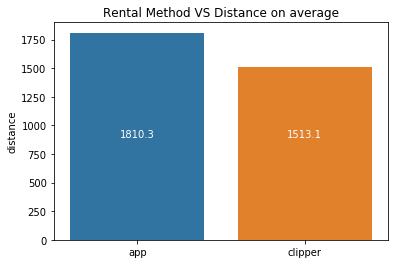

In [458]:
q = df.groupby(['rental_access_method']).mean().distance
sb.barplot(x = ['app' , 'clipper'] , y=q)
plt.title('Rental Method VS Distance on average');
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = q[label.get_text()]
    pct_string = '{:0.1f}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, 900, pct_string, ha = 'center', color = 'w');

**Observation:** surprisingly the difference is not that high, I was expecting that the users who use app will have a long trip.but the plot above shows that the clipper users have a close trip distance on average.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Surprisingly, customers are likely spend more in the bike than the subscribers, even that the number of subscriber is more than the customers.

Also, the use of clipper on subscriber is more than customers even for the app also.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

interesting relationship were found between the start_station_latitude and end_station_latitude that they have a strong relationship, also, the distance and duration had an interesting relationship that they have a low positive correlation.

surprisingly in the rental method VS the distance on average
the difference is not that high, I was expecting that the users who use app will have a long trip.but the plot above shows that the clipper users have a close trip distance on average.

## Multivariate Exploration




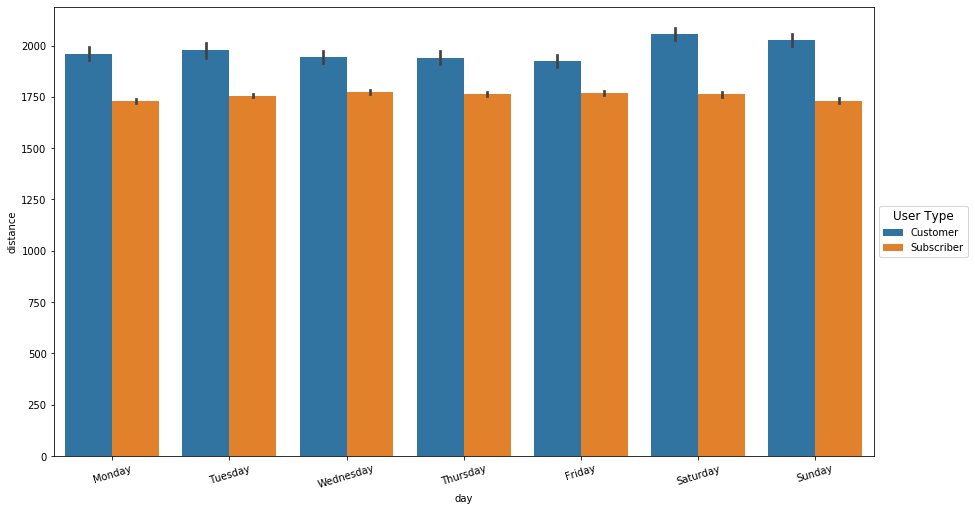

In [459]:
# ploting for the three varibles user_type , distance and day 
plt.figure(figsize=[14.70 , 8.27])
sb.barplot(data=df , x = 'day' , y = 'distance' , hue = 'user_type');
plt.xticks(rotation = 17);
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5) , title='User Type' , title_fontsize = 12);

**Observation:** Customers have more distance than the subscriber for all the days, which it was not expected.

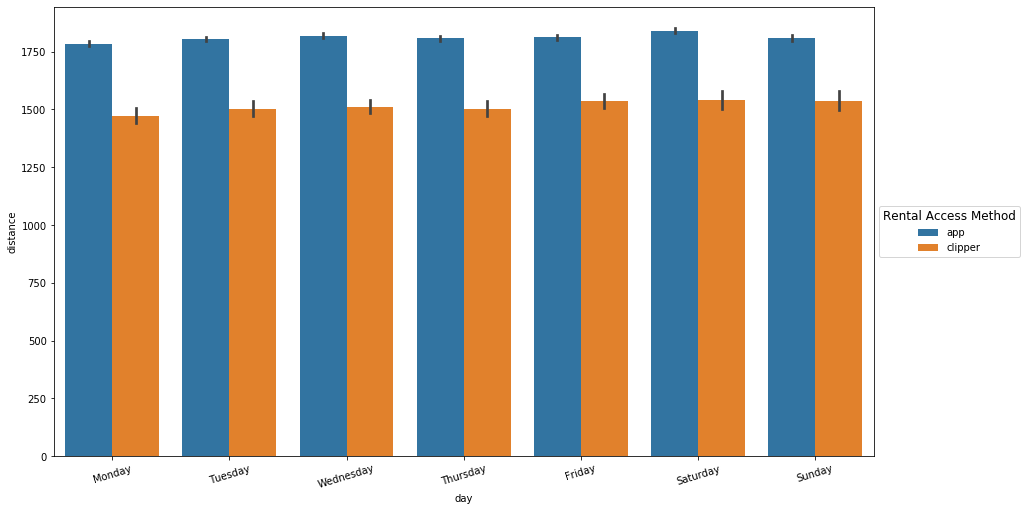

In [460]:
# ploting for the three varibles rental_access_method , distance and day 
plt.figure(figsize=[14.70 , 8.27])
sb.barplot(data=df , x = 'day' , y = 'distance' , hue = 'rental_access_method');
plt.xticks(rotation = 17);
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5) , title='Rental Access Method' , title_fontsize = 12);

**Observation:** The app users have more distance for all the days.

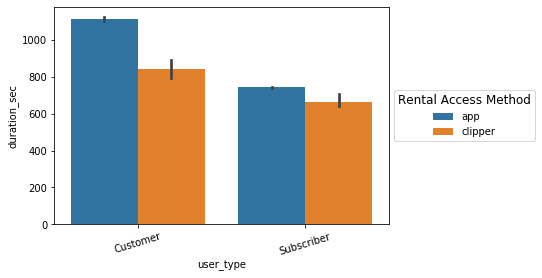

In [461]:
# ploting for the three varibles rental_access_method , duration_sec and day 
sb.barplot(data=df , x = 'user_type' , y = 'duration_sec' , hue = 'rental_access_method');
plt.xticks(rotation = 17);
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5) , title='Rental Access Method' , title_fontsize = 12);

**Observation:** When the customer is using app method he spend more time on the bike but when using clipper method the same for the subscriber

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customer using app method are more likely to spend time on the bike than the clipper method with a bigger difference than the subscribers.
Subscriber using app method are more likely to spend time on the bike than the clipper method

Regarding days, users who use app method got more distance than the users who use clipper method for all the days.
Also, sustomers have more distance than the subscriber for all the days.

### Were there any interesting or surprising interactions between features?

No

In [462]:
df.to_csv("slide_deck.csv" , index=False)